## **Download the dataset**

In [1]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [4]:
!pwd

/content


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d fareselmenshawii/human-dataset

Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/human-dataset
License(s): CC0-1.0
100% 5.33G/5.33G [05:26<00:00, 21.3MB/s]
100% 5.33G/5.33G [05:26<00:00, 17.5MB/s]


In [7]:
import zipfile
import os

# Create a directory for the dataset
os.makedirs('human-dataset', exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile('human-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human-dataset')

## **Model Train**

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 14.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [9]:
%pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 14.6 MB/s eta 0:00:00


In [11]:
import optuna
from ultralytics import YOLO

def objective(trial):
    # Define hyperparameters
    params = {
        'lr0': trial.suggest_loguniform('lr0', 1e-5, 1e-1),
        'momentum': trial.suggest_uniform('momentum', 0.6, 0.98),
        'weight_decay': trial.suggest_loguniform('weight_decay', 1e-6, 1e-2),
        'warmup_epochs': trial.suggest_int('warmup_epochs', 1, 5),
        'box': trial.suggest_uniform('box', 0.02, 0.2),
        'cls': trial.suggest_uniform('cls', 0.2, 4.0),
        'kobj': trial.suggest_uniform('kobj', 0.2, 4.0),  # Corrected
        'hsv_h': trial.suggest_uniform('hsv_h', 0.0, 0.1),
        'hsv_s': trial.suggest_uniform('hsv_s', 0.0, 0.9),
        'hsv_v': trial.suggest_uniform('hsv_v', 0.0, 0.9),
        'degrees': trial.suggest_uniform('degrees', 0.0, 45.0),
        'translate': trial.suggest_uniform('translate', 0.0, 0.1),
        'scale': trial.suggest_uniform('scale', 0.5, 1.5),
        'shear': trial.suggest_uniform('shear', 0.0, 0.1),
        'fliplr': trial.suggest_uniform('fliplr', 0.0, 1.0)
    }

    model = YOLO('yolov8n.pt')  # or your specific model path


    # Train the YOLO model with the suggested hyperparameters
    results = model.train(
        data='/content/data.yaml',
        epochs=20,
        batch=16,
        plots=True,
        imgsz=640,
        **params  # Pass parameters here
    )

    return results.metrics['val/mAP'] # or pass

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


# Get the best hyperparameters
print(study.best_params)

[I 2024-07-18 04:37:59,407] A new study created in memory with name: no-name-dce3a5ff-8bec-4112-993c-0d582778914b
<ipython-input-11-c4f951fbf354>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lr0': trial.suggest_loguniform('lr0', 1e-5, 1e-1),
<ipython-input-11-c4f951fbf354>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'momentum': trial.suggest_uniform('momentum', 0.6, 0.98),
<ipython-input-11-c4f951fbf354>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'weight_decay': trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)

Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 81.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/human-dataset/labels/train... 13754 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13754/13754 [00:10<00:00, 1337.02it/s]


train: New cache created: /content/human-dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/human-dataset/labels/val... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:03<00:00, 1230.69it/s]


val: New cache created: /content/human-dataset/labels/val.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.002362924629299592' and 'momentum=0.849145194939535' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0003995030888228349), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.23G    0.04173      15.36      1.733         64        640: 100%|██████████| 860/860 [01:38<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:21<00:00,  5.79it/s]


                   all       4000      16377      0.472      0.342      0.316      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.08G    0.04228      14.65       1.79         82        640: 100%|██████████| 860/860 [01:32<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.94it/s]


                   all       4000      16377      0.511      0.403      0.403      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.92G    0.04082      13.87      1.747        108        640: 100%|██████████| 860/860 [01:33<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.86it/s]


                   all       4000      16377      0.526      0.429      0.427      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.96G    0.03989      13.46       1.72         68        640: 100%|██████████| 860/860 [01:32<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  6.95it/s]


                   all       4000      16377      0.542      0.436      0.442      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.96G    0.03969      13.09      1.698         72        640: 100%|██████████| 860/860 [01:32<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  6.99it/s]


                   all       4000      16377      0.538      0.454      0.422      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.84G    0.03896       12.8      1.671        105        640: 100%|██████████| 860/860 [01:32<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.91it/s]


                   all       4000      16377      0.569      0.453      0.476      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         4G    0.03848      12.59       1.67         51        640: 100%|██████████| 860/860 [01:32<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.91it/s]


                   all       4000      16377      0.581      0.464      0.478      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.45G    0.03802      12.34      1.648        103        640: 100%|██████████| 860/860 [01:32<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.91it/s]


                   all       4000      16377      0.585      0.472      0.492      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.25G    0.03762      12.03      1.633         93        640: 100%|██████████| 860/860 [01:33<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  6.98it/s]


                   all       4000      16377      0.609      0.481      0.514      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.89G    0.03737      11.95      1.629         47        640: 100%|██████████| 860/860 [01:32<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  7.02it/s]


                   all       4000      16377      0.608      0.493      0.525      0.252
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.68G    0.03706      11.91      1.702         81        640: 100%|██████████| 860/860 [01:31<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  7.02it/s]


                   all       4000      16377      0.615      0.491      0.522      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       3.3G    0.03647      11.54      1.685         44        640: 100%|██████████| 860/860 [01:29<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  6.99it/s]


                   all       4000      16377       0.62      0.481      0.518      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.64G    0.03619      11.43      1.685         68        640: 100%|██████████| 860/860 [01:29<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.78it/s]


                   all       4000      16377      0.633       0.49      0.538      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.94G    0.03588      11.26      1.667         46        640: 100%|██████████| 860/860 [01:29<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.80it/s]


                   all       4000      16377      0.631      0.495      0.538      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.23G    0.03548      10.97      1.653         51        640: 100%|██████████| 860/860 [01:28<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.85it/s]


                   all       4000      16377      0.629      0.506      0.547      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         4G    0.03523      10.77      1.636         28        640: 100%|██████████| 860/860 [01:29<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  7.08it/s]


                   all       4000      16377      0.637      0.507      0.553      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.98G      0.035      10.61      1.629         38        640: 100%|██████████| 860/860 [01:30<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  7.02it/s]


                   all       4000      16377      0.645      0.514       0.56      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.74G    0.03462       10.4      1.622         47        640: 100%|██████████| 860/860 [01:29<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  7.05it/s]


                   all       4000      16377       0.65      0.515      0.564      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.74G    0.03433       10.2       1.61         61        640: 100%|██████████| 860/860 [01:29<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:17<00:00,  7.13it/s]


                   all       4000      16377      0.649      0.517      0.568      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.27G    0.03398      10.06      1.595         48        640: 100%|██████████| 860/860 [01:29<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.90it/s]


                   all       4000      16377      0.657      0.521      0.573       0.28

20 epochs completed in 0.617 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:22<00:00,  5.44it/s]


                   all       4000      16377      0.656      0.521      0.573       0.28
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


[W 2024-07-18 05:15:58,763] Trial 0 failed with parameters: {'lr0': 0.002362924629299592, 'momentum': 0.849145194939535, 'weight_decay': 0.0003995030888228349, 'warmup_epochs': 1, 'box': 0.1633118478324708, 'cls': 3.9832438562838495, 'kobj': 0.27023369279990855, 'hsv_h': 0.013550189960541593, 'hsv_s': 0.39022614966482044, 'hsv_v': 0.49560731714757456, 'degrees': 15.572183438307336, 'translate': 0.07063604341974929, 'scale': 0.7863180478473775, 'shear': 0.015567367058611649, 'fliplr': 0.8405753229854673} because of the following error: The value ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab0dfcb68f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.0070

Ultralytics YOLOv8.2.59 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/human-dataset/labels/train.cache... 13754 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13754/13754 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/human-dataset/labels/val.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00021062892195103432' and 'momentum=0.7556211376508074' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0008990114704959661), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.19G    0.02131      5.023      1.623         63        640: 100%|██████████| 860/860 [01:43<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:18<00:00,  6.85it/s]


                   all       4000      16377      0.534      0.375      0.381      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.26G    0.02187      4.809       1.71        133        640:   7%|▋         | 60/860 [00:06<01:28,  9.08it/s]
Exception in thread Thread-73 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 54, in _pin_memory_loop
[W 2024-07-18 05:20:00,770] Trial 1 failed with parameters: {'lr0': 0.00021062892195103432, 'momentum': 0.7556211376508074, 'weight_decay': 0.0008990114704959661, 'warmup_epochs': 3, 'box': 0.09144473568750337, 'cls': 1.3961621261122776, 'kobj': 2.0398928003521695, 'hsv_h': 0.07764684967371926, 'hsv_s': 0.1712026781955371, 'hsv_v': 0.8425962935187508, 'degrees': 16.47373806879617, 'translate': 0.003141513306013888, 'scale': 0.5558249590644445, 'shear': 0.0926301874812853

KeyboardInterrupt: 

In [15]:
# !yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=100 imgsz=640 batch=16 plots=True augment=True

In [12]:
from IPython.display import Image


In [13]:
!ls /content/runs/detect/train2

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

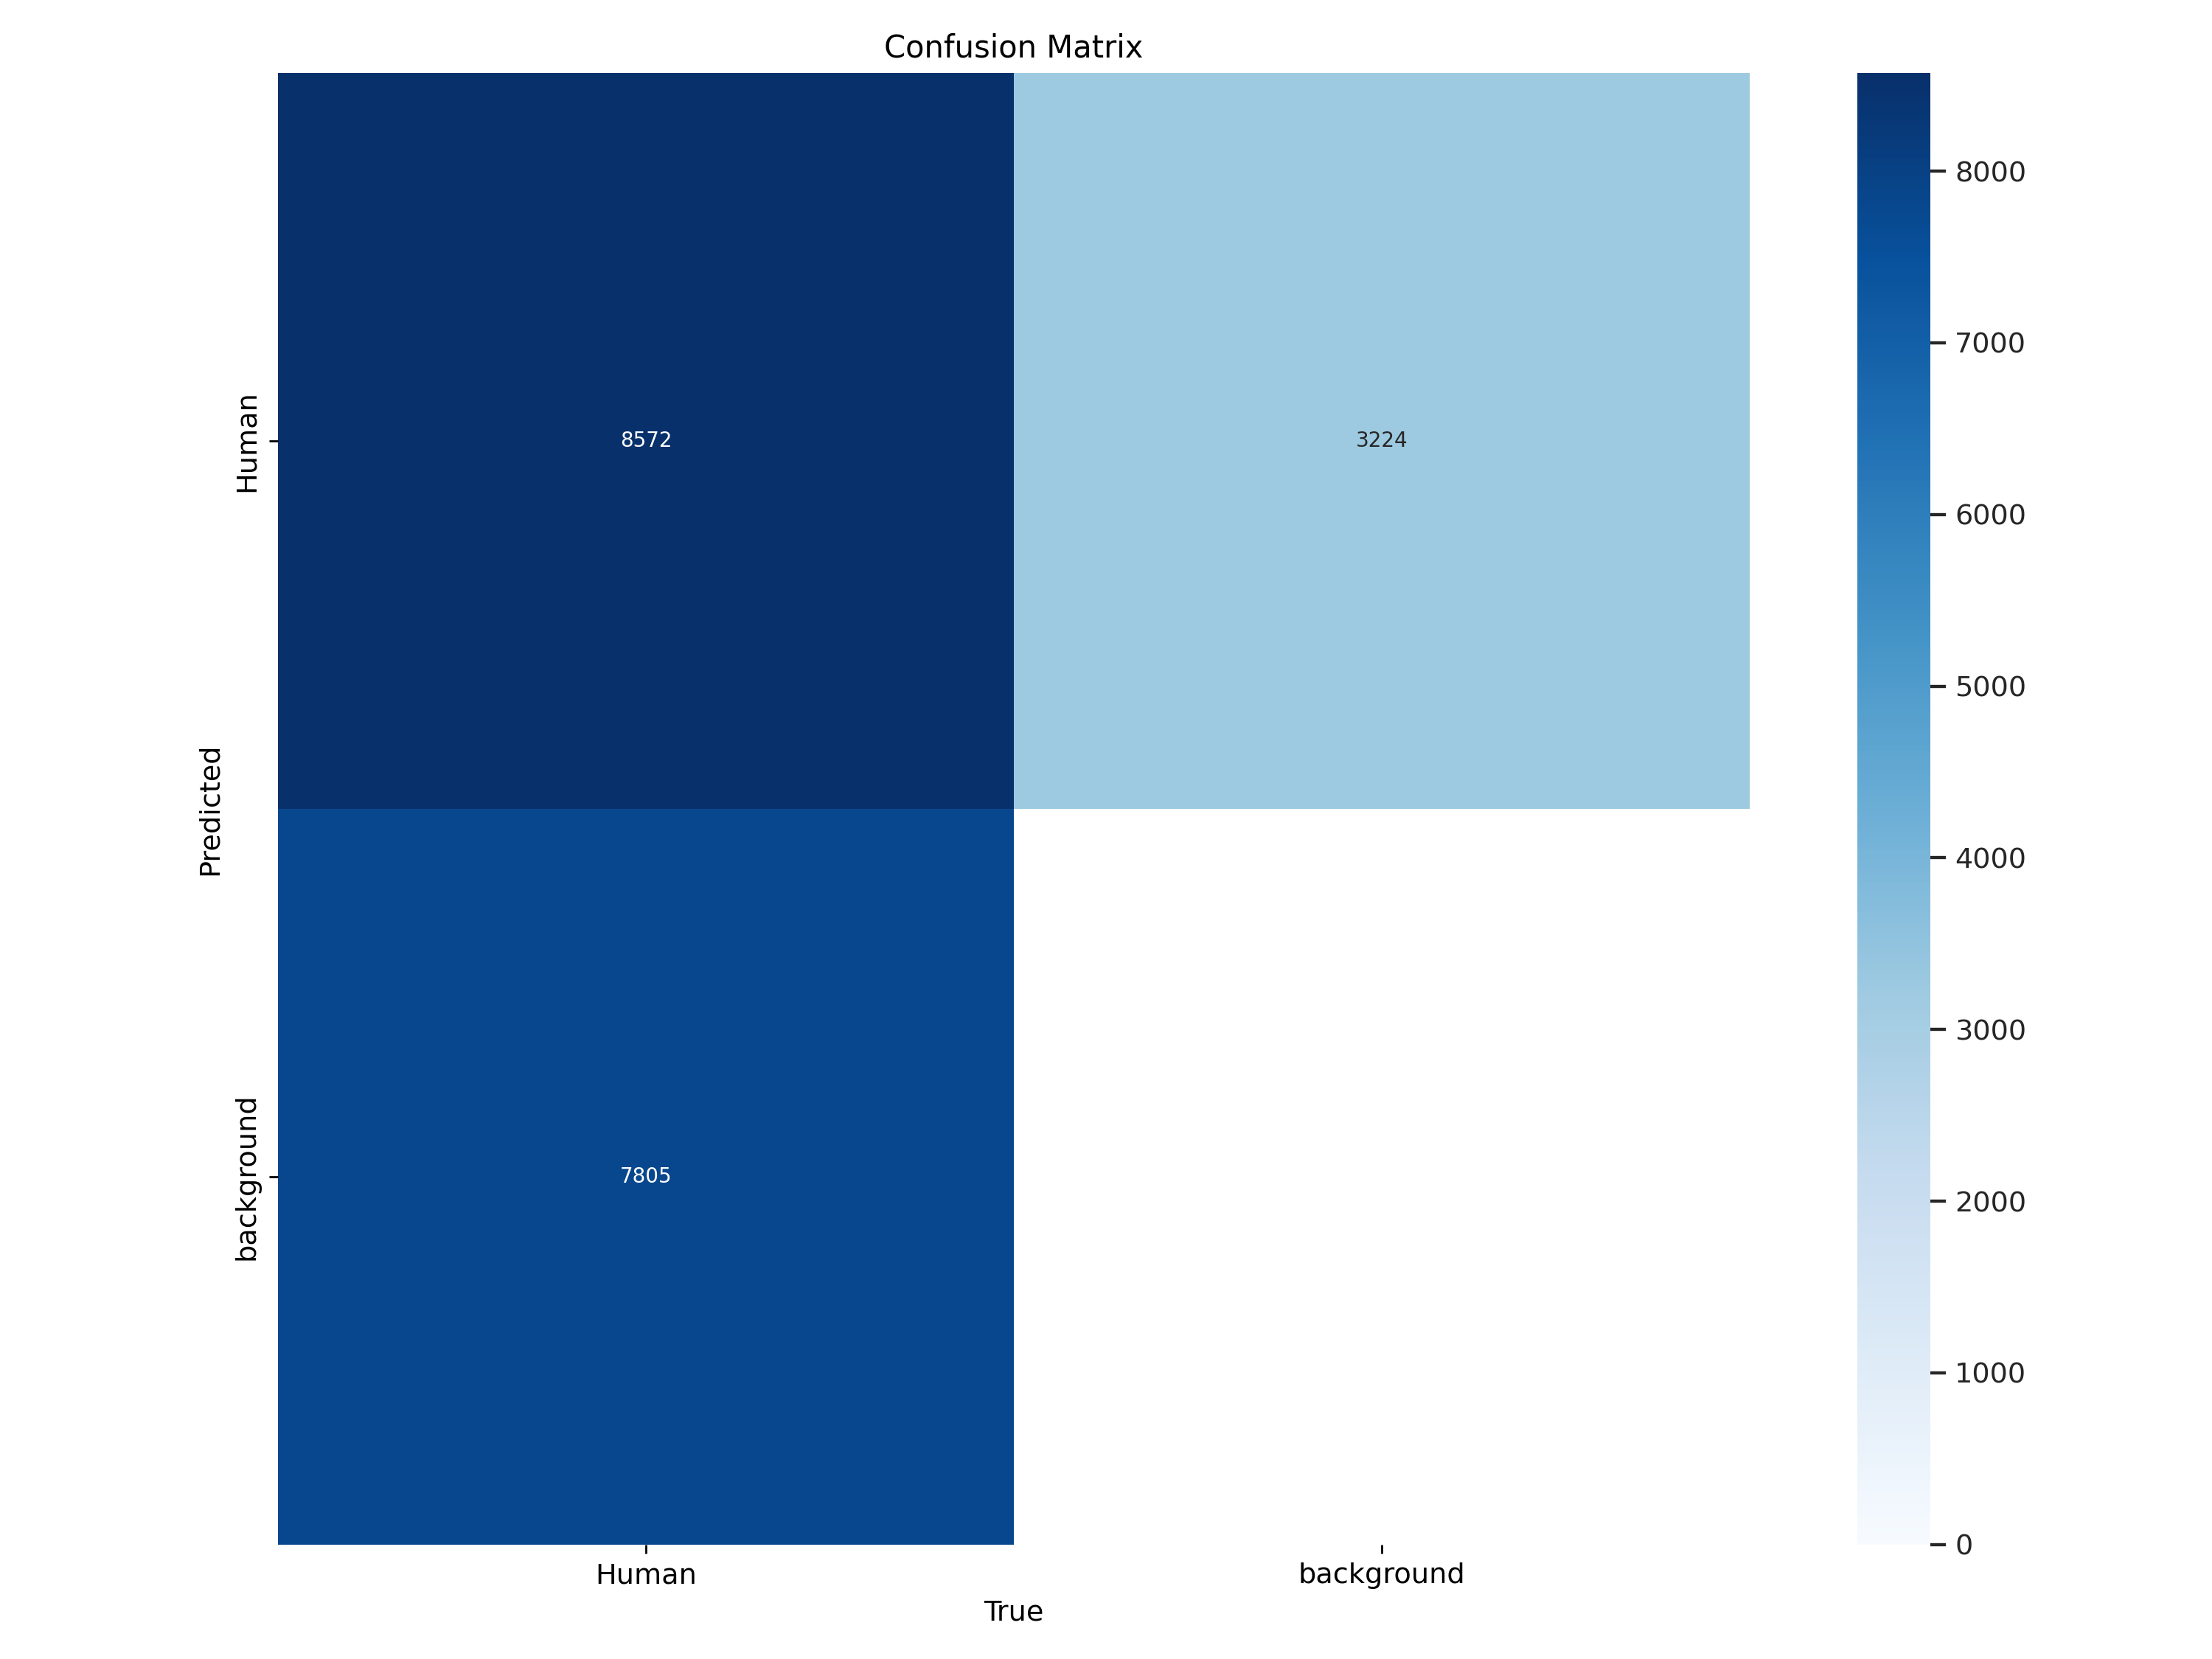

In [16]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

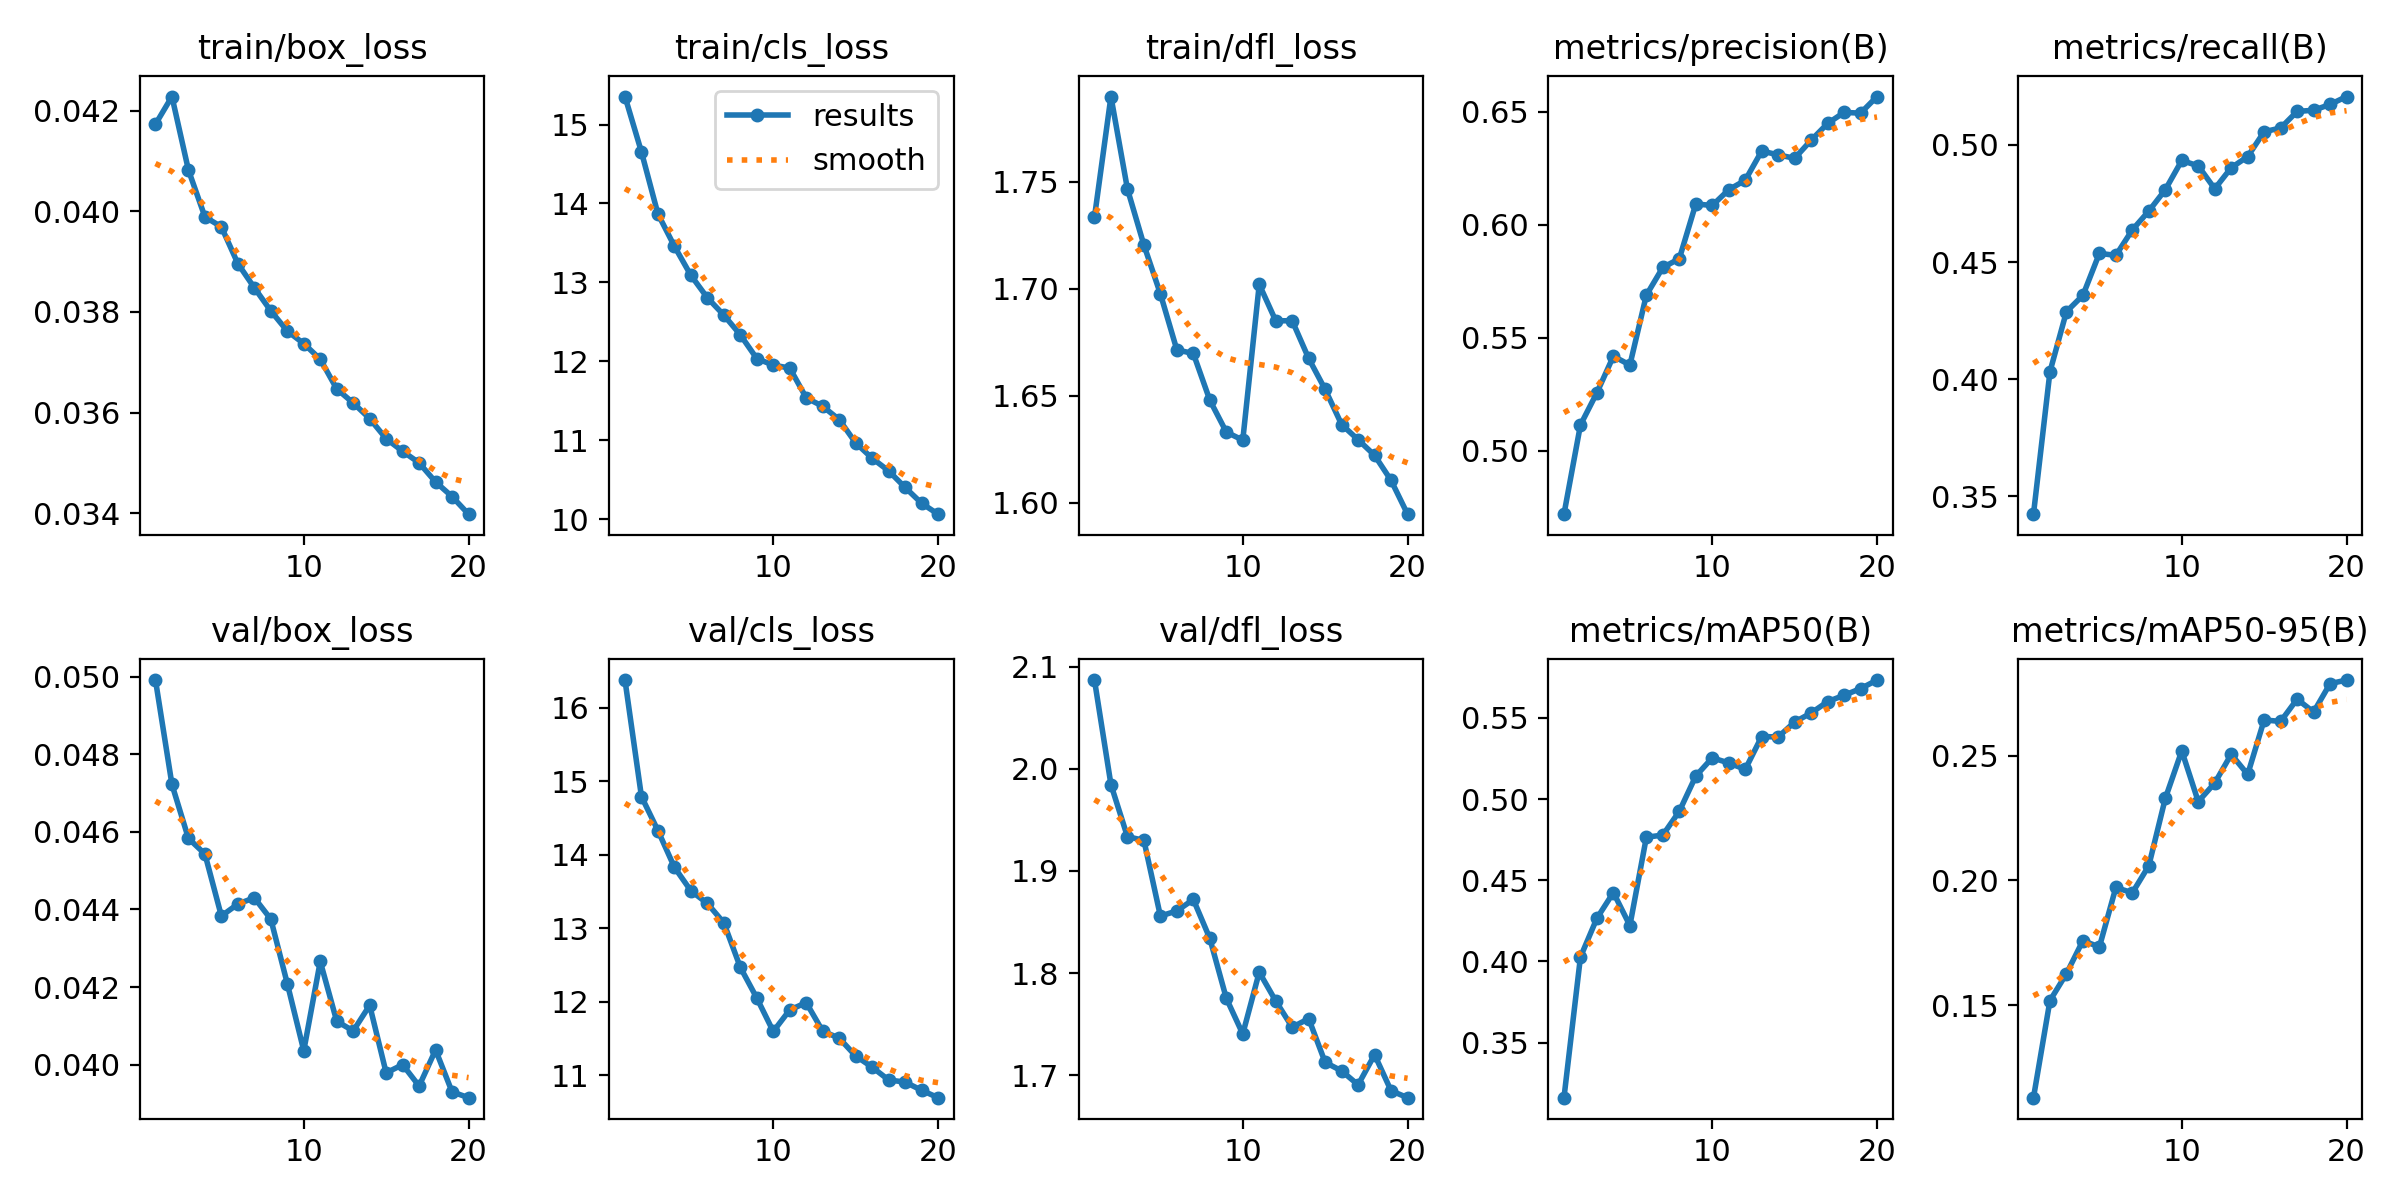

In [17]:
Image(filename='/content/runs/detect/train2/results.png', width=600)

In [20]:
import pandas as pd
results=pd.read_csv("/content/runs/detect/train2/results.csv")

In [21]:
results.max()

                  epoch    20.000000
         train/box_loss     0.042280
         train/cls_loss    15.355000
         train/dfl_loss     1.789800
   metrics/precision(B)     0.656630
      metrics/recall(B)     0.520670
       metrics/mAP50(B)     0.573220
    metrics/mAP50-95(B)     0.280270
           val/box_loss     0.049910
           val/cls_loss    16.377000
           val/dfl_loss     2.087000
                 lr/pg0     0.001998
                 lr/pg1     0.001998
                 lr/pg2     0.001998
dtype: float64

In [22]:
results.min()

                  epoch     1.000000
         train/box_loss     0.033980
         train/cls_loss    10.062000
         train/dfl_loss     1.594600
   metrics/precision(B)     0.471870
      metrics/recall(B)     0.342290
       metrics/mAP50(B)     0.316180
    metrics/mAP50-95(B)     0.112890
           val/box_loss     0.039150
           val/cls_loss    10.695000
           val/dfl_loss     1.678000
                 lr/pg0     0.000119
                 lr/pg1     0.000119
                 lr/pg2     0.000119
dtype: float64

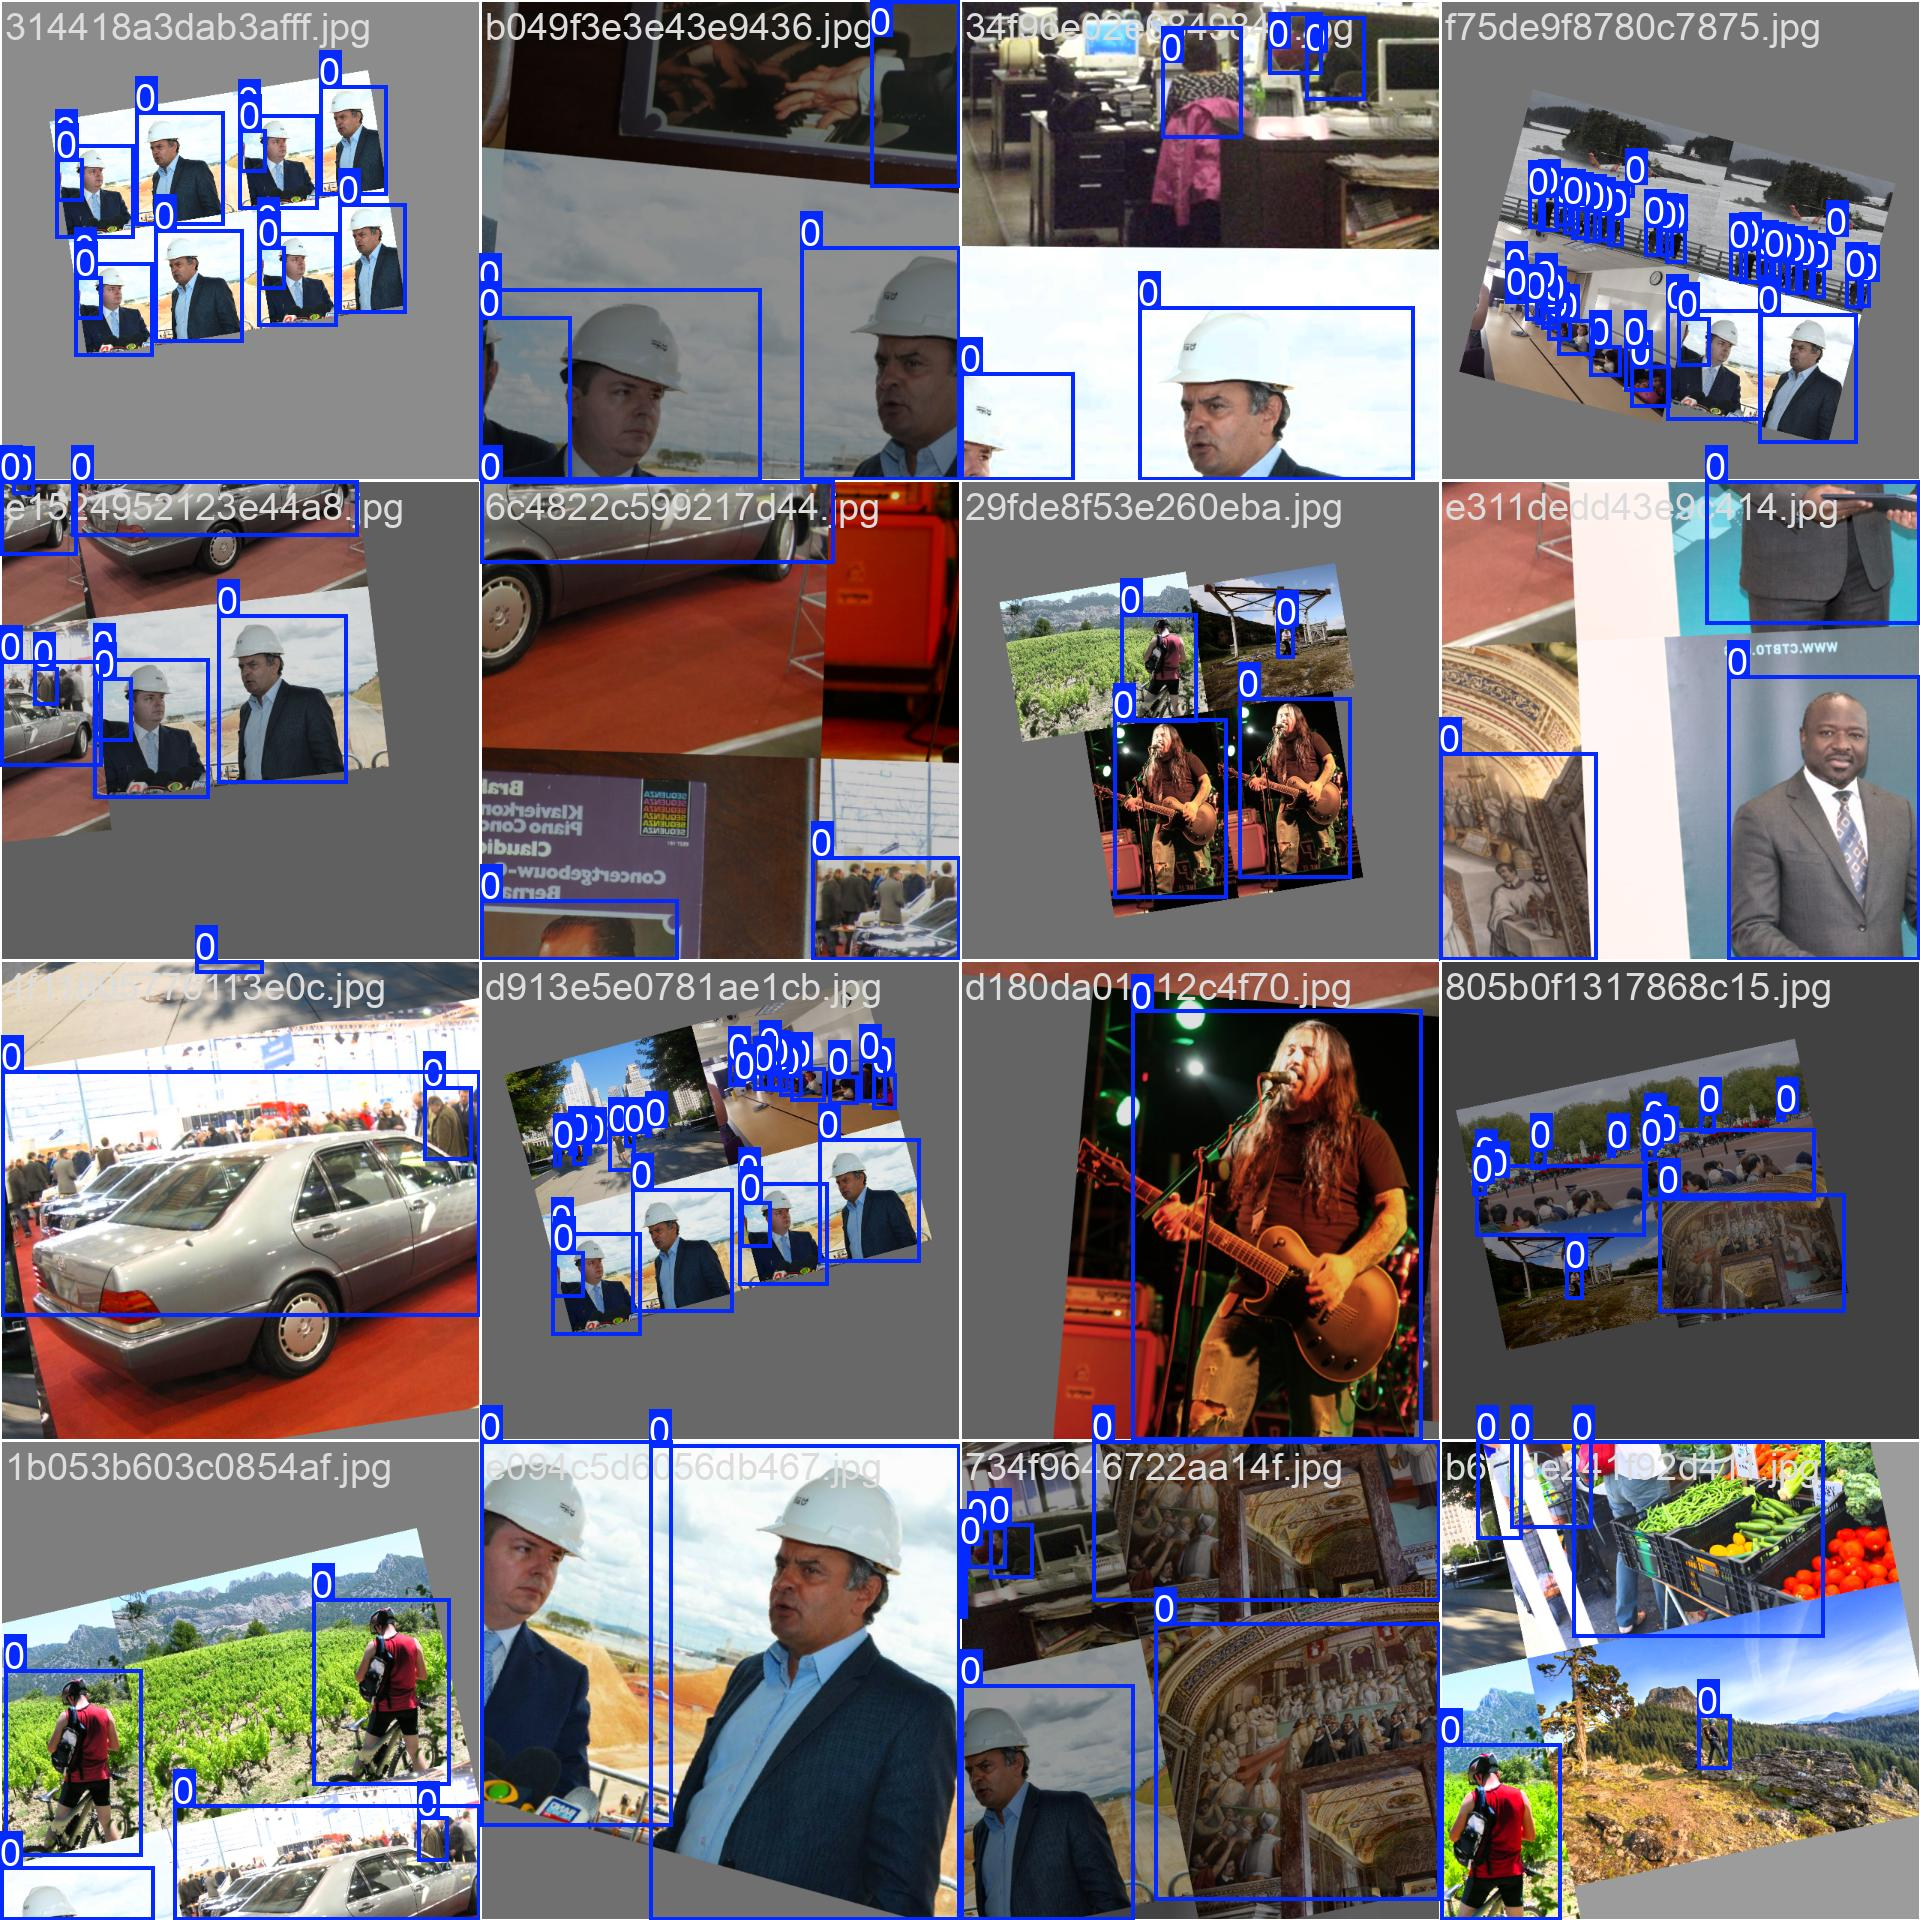

In [23]:
Image(filename='/content/runs/detect/train2/train_batch0.jpg', width=600)

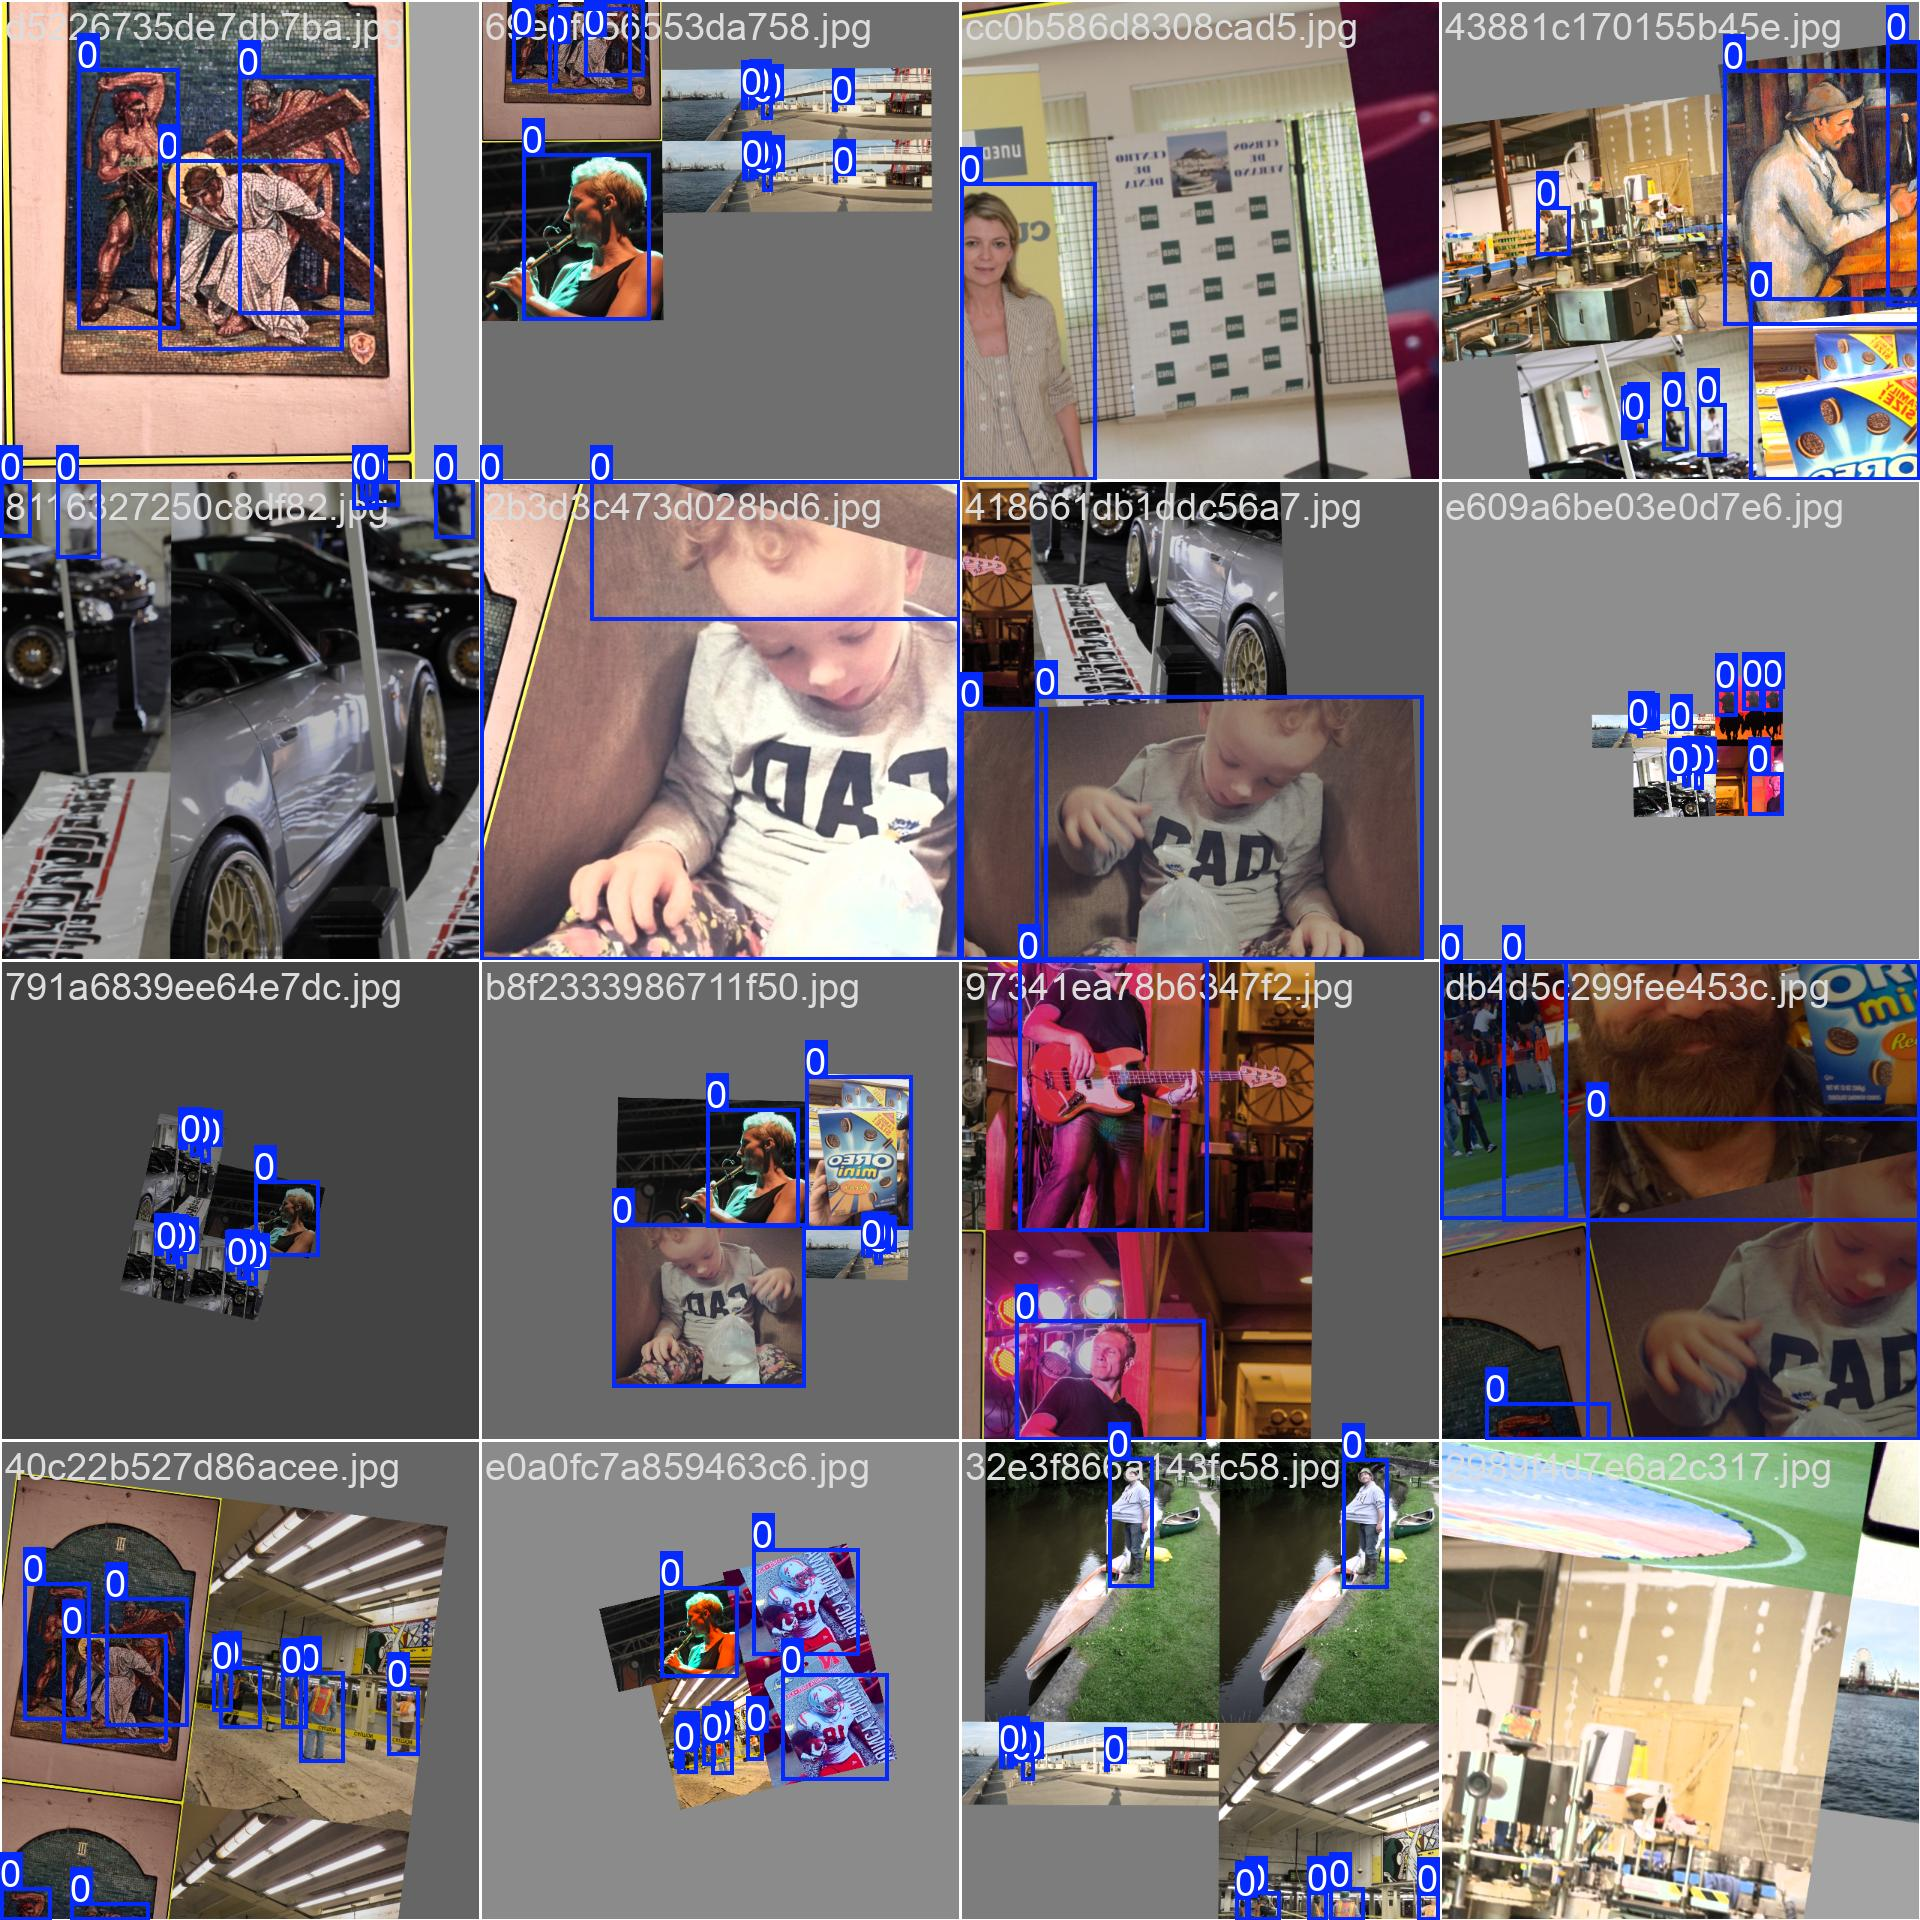

In [25]:
Image(filename='/content/runs/detect/train2/train_batch2.jpg', width=600)

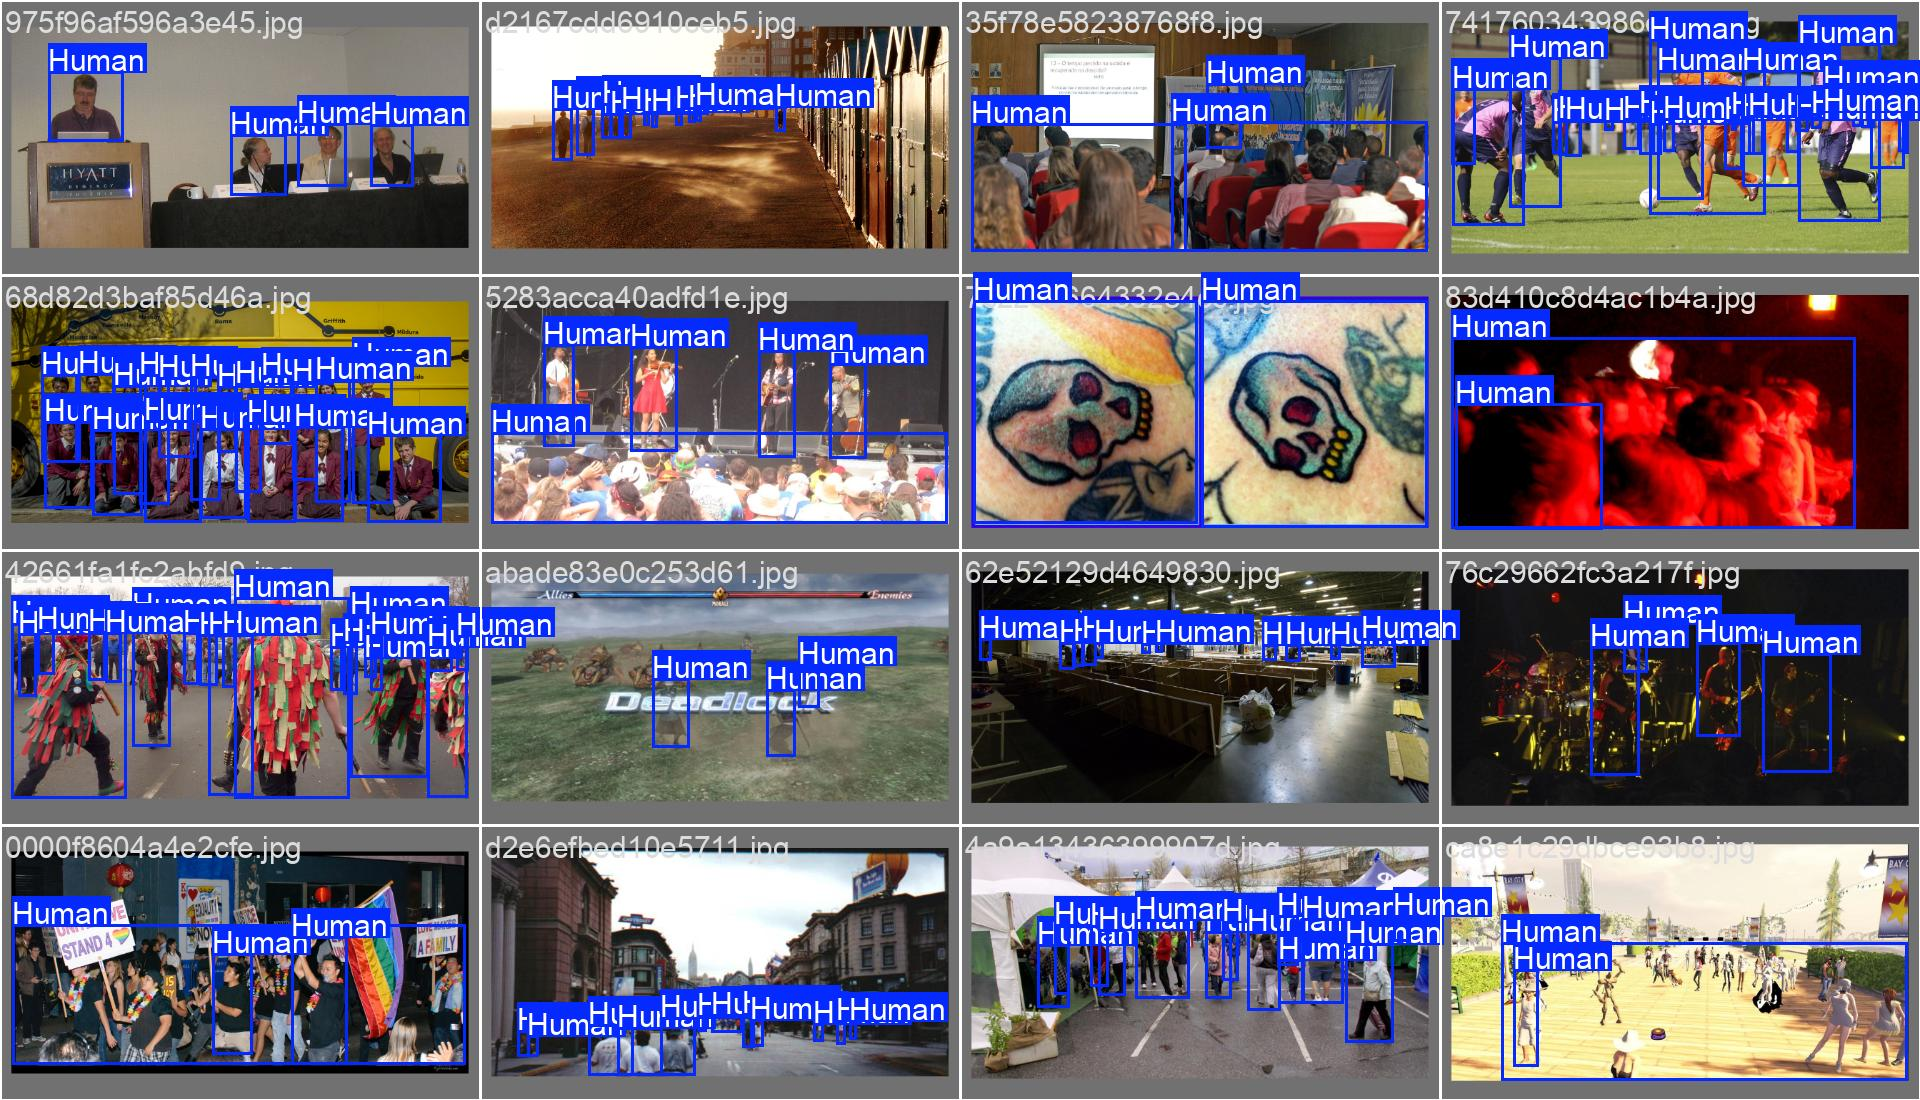

In [26]:
Image(filename='/content/runs/detect/train2/val_batch1_labels.jpg', width=600)

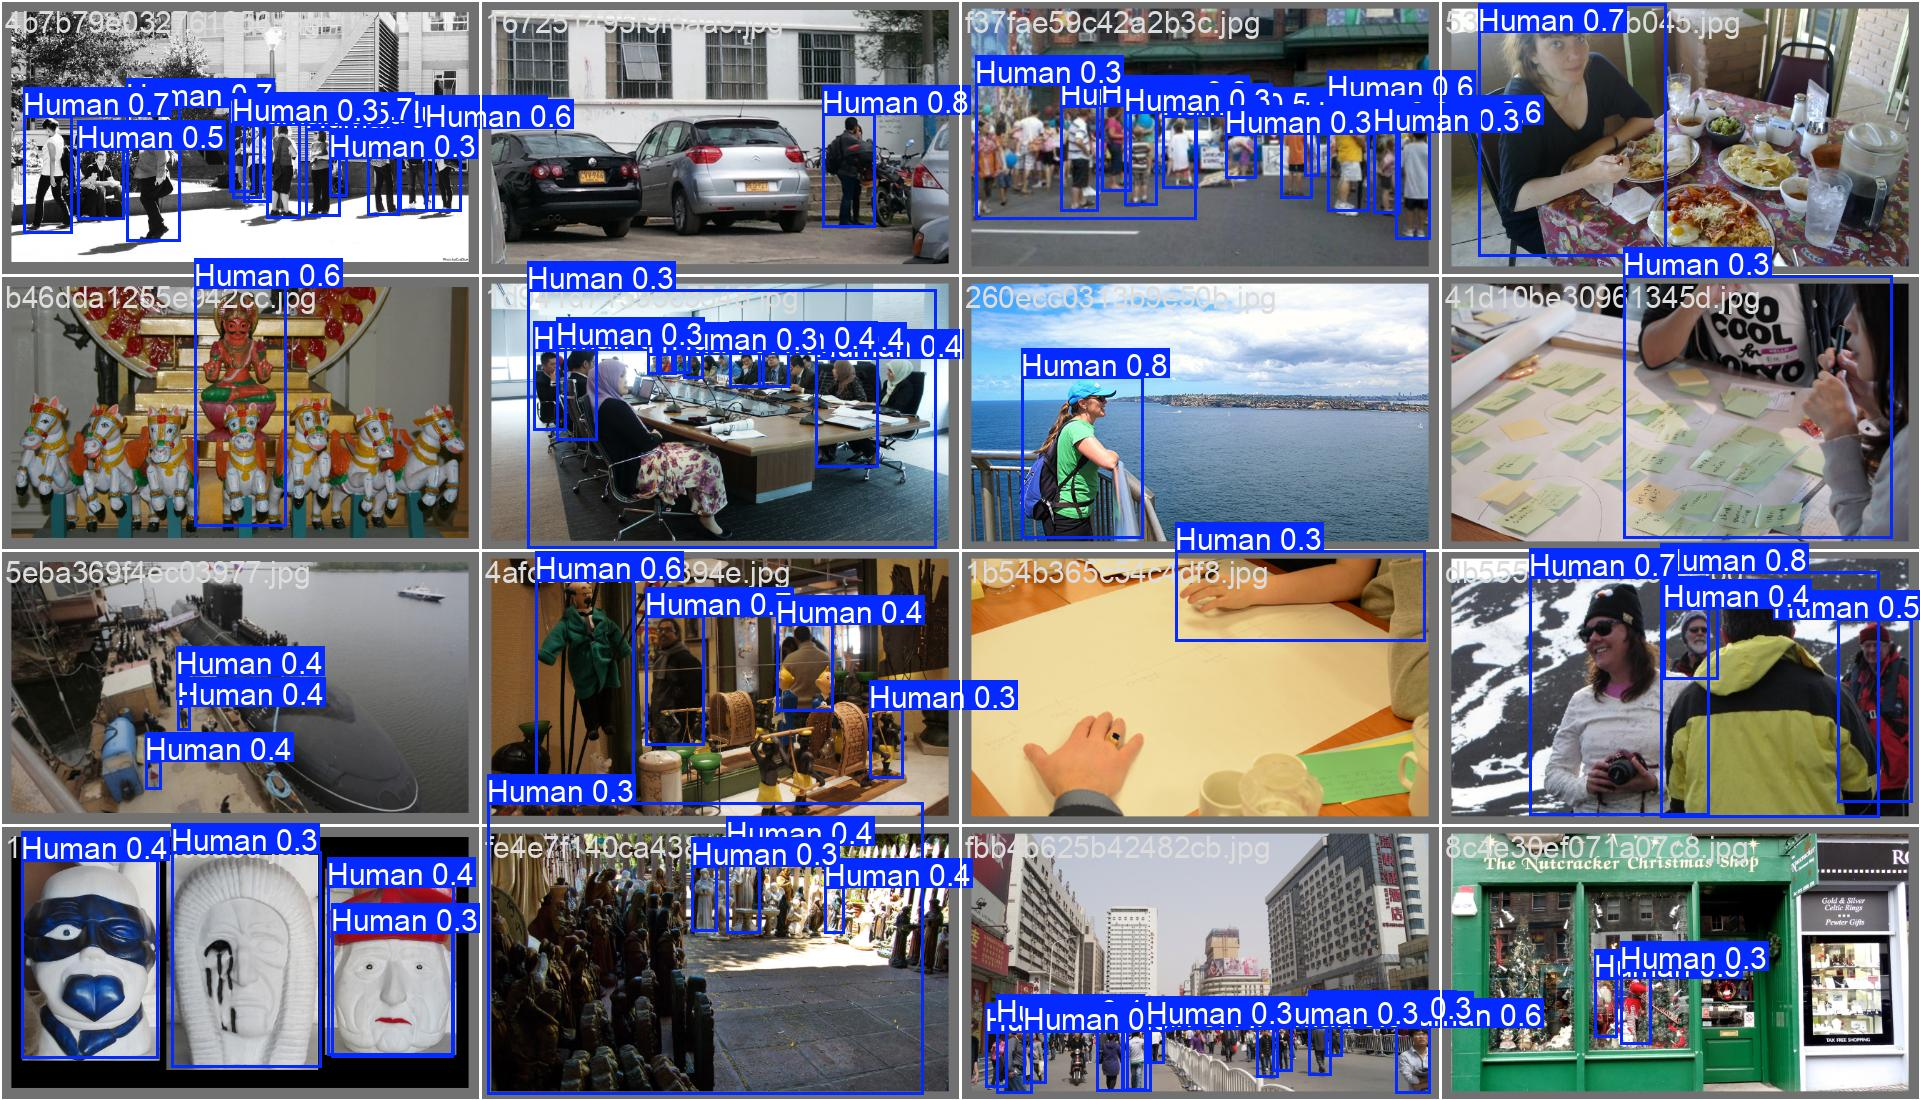

In [27]:
Image(filename='/content/runs/detect/train2/val_batch2_pred.jpg', width=600)